In [ ]:
%%javascript
IPython.notebook.get_cells().map( function(c){ return c.code_mirror.options.indentWithTabs = true;});

CodeMirror.defaults.indentWithTabs = true;

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as px

In [ ]:
evens = np.array(list(range(0,50,2)))
e_out = evens / 2
odds = np.array(list(range(1,50,2)))
o_out = 3 * odds + 1

In [ ]:
%matplotlib inline

In [ ]:
def collatz(val):
	if val%2 == 0: return val/2
	else: return 3*val + 1

In [ ]:
def plot_path(val):
	log = 0.5*math.log2(val) #find log4 val
	p = log if log == int(log) else None
	ptsx = [val]; ptsy = [0]
	while val != 1:
		i = ptsx[-1]
		ptsx.append(i)
		val = collatz(i)
		if not p:
			check_pow = 0.5*math.log2(val)
			if int(check_pow) == check_pow:
				p = check_pow
		ptsy.append(val)#
		ptsx.append(val); ptsy.append(val)
	#plt.plot(ptsx,ptsy)
	return p

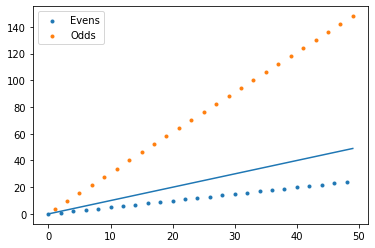

In [ ]:
plt.scatter(evens, e_out, label="Evens", marker='.')
plt.plot(range(50),range(50))
plt.scatter(odds, o_out, label="Odds", marker='.')
#for i in range(6):
#	plt.plot([0,50],[2**i,2**i],label=f"2^{i}")
initval = 45
pow_4 = plot_path(initval)

plt.legend()
plt.show()

In [ ]:
a = np.array(range(3, 320000))
b =tuple(map(plot_path,a))
px.scatter(x=a,y=b)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
c = np.array([a,b]).T

In [ ]:
import pandas as pd
ptsdf = pd.DataFrame(c,columns=['x','y'])

In [ ]:
gb = ptsdf.groupby('y')
freqdf = pd.DataFrame({'y':[i[0] for i in gb],'No. Points':[len(i[1]) for i in gb]})

In [ ]:
freqdf

,y,No. Points
0,1.0,2
1,2.0,299936
2,3.0,16
3,4.0,7697
4,5.0,12137
5,6.0,10
6,7.0,45
7,8.0,148
8,9.0,3
9,10.0,3


In [ ]:
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

In [1]:
def check_from(n):
    if n%3 == 1 and (n//3)%2:
        return (n//3, n*2)
    else:
        return (n*2,)

In [ ]:
l = [1]
d2 = {1:[2]}
for k in l:
    for val in d2[k]:
        if not (val in d2):
            d2[val] = check_from(val)
            l.append(val)
    if len(d2) >= 20: break

dG = nx.DiGraph(d2)
nx.set_node_attributes(dG, 0, 'connections')



In [ ]:
nx.set_node_attributes(dG, nx.drawing.spring_layout(dG, k=1), 'pos')

edge_x = []
edge_y = []
for edge in dG.edges():
    x0, y0 = dG.nodes[edge[0]]['pos']
    x1, y1 = dG.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in dG.nodes():
    x, y = dG.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:
node_adjacencies = []
node_text = []
for node in dG.nodes():
    node_text.append(str(node))

#node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=True,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pic = nx.drawing.nx_pydot.to_pydot(dG)
pic.write_png('/content/drive/tree.png')

OSError: ignored

drive/  sample_data/
